In [ ]:
!git clone https://github.com/laumonfe/NordicWomenInSTEM.git

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from scipy.spatial import ConvexHull
from NordicWomenInSTEM.utils import from_grayscale_to_color, plot_matrix_as_image, separate_channels, plot_points
from NordicWomenInSTEM.utils import create_black, create_light_blue, create_orange, create_yellow, create_purple, create_new_color
from NordicWomenInSTEM.utils import excercise1, excercise2, excercise3

# What is a matrix? 

![](images/matrix_easy.png)

In [27]:
my_matrix = np.array([[255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255],
                      [255,255,255,255,255,255,255,255,255,252,254,246, 87, 79, 86, 93,252,254,254,255,255,255,255,255,255,255,255,255,255,255,255,255],
                      [255,255,255,255,255,255,255,254,109, 82, 78, 78, 76, 78, 74, 78, 78, 82, 86,254,254,255,255,255,255,255,255,255,255,255,255,255],
                      [255,255,255,255,255,255,255, 83, 79, 75, 72, 71, 71, 68, 70, 70, 72, 74, 78, 80,190,254,255,255,255,255,255,255,255,255,255,255],
                      [255,255,255,255,255,253, 82, 74, 74, 68, 68, 64, 64, 64, 64, 64, 64, 68, 74, 76, 80,120,254,255,255,255,255,255,255,255,255,255],
                      [255,255,255,255,254, 82, 76, 70, 67, 64, 64, 64, 64, 64, 64, 64, 64, 64, 66, 71, 74, 80,253,255,255,255,255,255,255,255,255,255],
                      [255,255,255,254,238, 76, 72, 66, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 71, 75, 82,255,255,255,255,255,255,255,255,255],
                      [255,255,255,255, 76, 72, 65, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 69, 76,255,255,255,255,255,255,255,255,255],
                      [255,255,255,254, 74, 68, 64, 64, 64, 64, 64, 64, 64, 64, 63,190,203, 64, 64, 64, 64, 65, 74,254,255,255,255,255,255,255,255,255],
                      [255,255,255,253, 68, 64, 64, 64, 64, 64, 64, 64, 60,205,198,200,200,200, 64, 64, 64, 64, 68, 74,254,255,255,255,255,255,255,255],
                      [255,255,255,121, 66, 64, 64, 64, 64, 64, 64,207,200,200,200,200,200,200,201, 64, 64, 64, 64, 72,255,255,255,255,255,255,255,255],
                      [255,255,255, 76, 64, 64, 64, 69,234,238,238,240,240,240,240,240,238,236,232,228, 67, 64, 64, 63,255,255,255,255,254,254,254,254],
                      [255,255,255, 94, 64, 64,104,208,155,152,151,208,208,208,208,208,150,152,177,206,228, 64, 64, 69,255,255,255,255,251,192,192,254],
                      [255,255,255,156, 64, 64,228,213,207,209,203,202,208,208,208,212,210,210,218,208,230, 64, 64, 58,254,255,255,254,224,232,192,253],
                      [255,255,255,252, 64, 72,230,206,202,124,135,206,206,206,206,206,124,124,206,206,228, 64, 64, 68,255,255,254,250,226,250,227,254],
                      [255,255,255,242, 64, 63,230,206,112,114,114,206,241,244,244,206,114,114,118,206,228, 66, 64, 67,255,254,252,180,180,223,227,254],
                      [255,255,255,253, 64,196,229,207,204,100,206,240,197,200,201,240,199,107,204,199,225,177, 64, 69,254,211,180,180,180,180,251,255],
                      [255,255,255,255, 64, 84,197,215,234,238,243,197,200,198,198,198,238,238,232,208,197, 75, 64,238,254,180,180,180,180,180,175,255],
                      [255,255,255,252, 62, 58,200,200,200,200,198,200,201,156,200,200,200,200,198,200,198, 64, 64,254,254,130,180,180,180,180,180,251],
                      [255,255,255,254, 64, 64,196,200,200,200,198,197,198,197,198,205,197,200,200,200,198, 64, 64,254,251,180,180,180,180,180,180,253],
                      [255,255,255,254, 68, 64, 64,199,200,200,197, 93, 94, 94, 94, 93,197,200,200,198, 64, 64, 70,255,254,212,205,180,180,180,180,249],
                      [255,255,255,255, 72, 64, 64, 49,198,200,200,198,201, 94,191,198,200,200,198, 66, 64, 64, 72,254,213,210,250,208,187,180,180,252],
                      [255,255,255,255, 52, 72, 64, 64, 66,198,200,200,200,200,200,200,200,198, 64, 64, 64, 69, 78,206,206,205,209,208,204,179,179,243],
                      [255,255,255,255, 79, 76, 67, 64, 64, 83,198,198,200,200,200,198,197, 64, 64, 64, 66, 73,174,151,157,164,170,176,209,230,217,254],
                      [255,255,255,255,240, 76, 71, 68, 64, 64, 64,155,189,196,186,158, 64, 64, 64, 68, 74,169,137,144,155,167,242,172,207,228,217,250],
                      [255,255,255,255,254, 84, 79,219,225,195,195,156,158,158,158,158,195,195,225,215,138,113,117,141,149,246,162,164,205,226,215,255],
                      [255,255,255,255,219,226,228,232,209,208,208,161,158,158,158,159,208,208,210,234,232,203,114,114,114,114,150,156,205,226,213,255],
                      [255,255,255,224,227,234,235,241,243,217,217,179,179,179,179,216,217,221,244,241,239,233,191,192,117,114,114,145,203,224,211,255],
                      [255,255,227,227,234,240,244,246,246,224,224,224,174,174,174,222,224,224,246,246,244,240,238,209,250,198,200,193,235,222,207,255],
                      [255,250,230,233,242,246,246,246,220,224,224,224,167,167,167,224,224,224,233,246,246,246,239,209,246,246,246,244,232,220,208,255],
                      [255,224,232,237,244,246,246,246,246,224,224,224,159,159,159,224,224,224,246,246,246,246,239,208,246,246,246,244,230,218,227,255],
                      [255,230,236,242,246,246,246,246,246,246,226,228,154,154,154,226,226,246,246,246,246,246,235,246,246,246,246,248,231,220,251,255]
                      ])

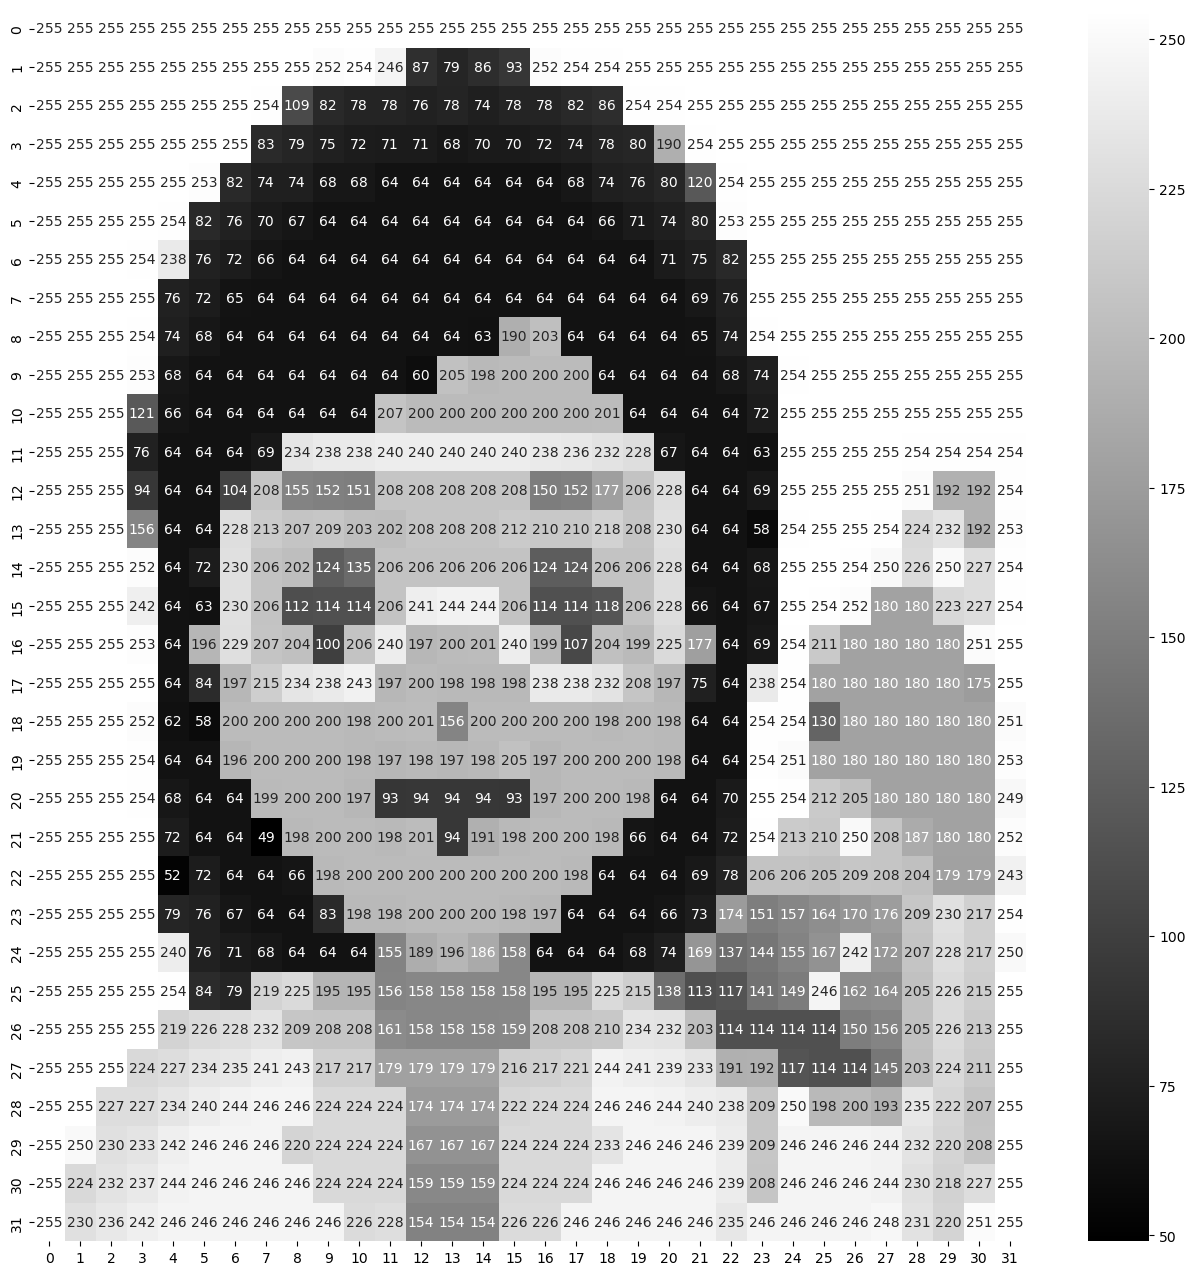

In [28]:
plot_matrix_as_image(my_matrix)

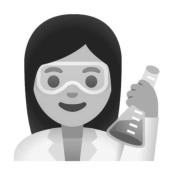

In [29]:
_img = cv2.imread("/content/NordicWomenInSTEM/images/img.jpg")
grayscale = cv2.cvtColor(_img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize = (2, 2))
plt.imshow(grayscale, cmap = 'gray')
plt.axis("off")
plt.show()

# How do we get Color images? 

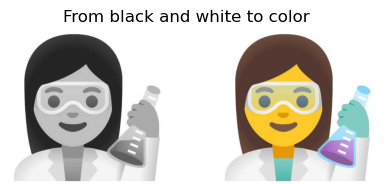

In [30]:
img = cv2.cvtColor(_img, cv2.COLOR_BGR2RGB)
from_grayscale_to_color(grayscale, img)

![](images/rgb.png)

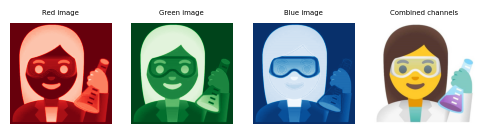

In [31]:
separate_channels(img)

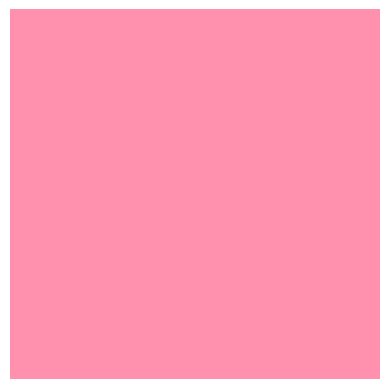

In [32]:
create_new_color(red = 255, green = 145, blue = 175)

## Let's do a color excercise! 

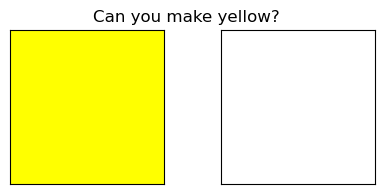

In [37]:
create_yellow(red = 255, green = 255, blue = 255)

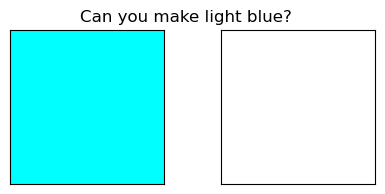

In [36]:
create_light_blue(red = 255, green = 255, blue = 255)

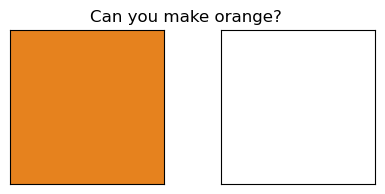

In [34]:
create_orange(red = 255, green = 255, blue = 255)

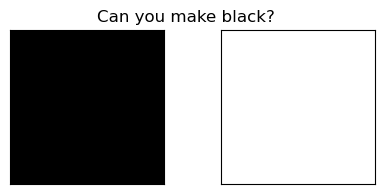

In [33]:
create_black(red = 255, green = 255, blue = 255)

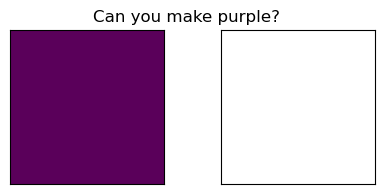

In [35]:
create_purple(red = 255, green = 255, blue = 255)

# Putting it all together

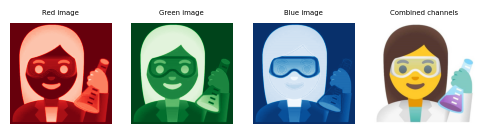

In [38]:
separate_channels(img)

Make images explaining different transforms with the lade being bigger and smaller, moved. 


ToDo = explain x and y based on up and down, left and right. Also add a piture with examples
// make an exercise: 3 excercises. Make it bigger 
make it in the negative y axis 
make it smaller and bigger 

make a template with the target position and dimensions of the square.

# Trsansformations

![](images/transforms_reduced.png)

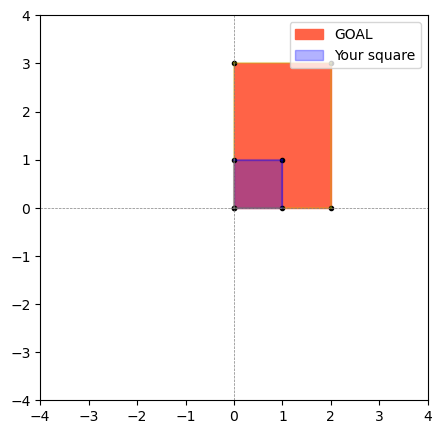

In [45]:
from utils import excercise1

W = 1 # width of the shape
H = 1 # height of the shape
X = 0
Y = 0

M1 = np.float32([[W, 0, X],
            	[0, H, Y],
            	[0, 0, 1]])
excercise1(M1)

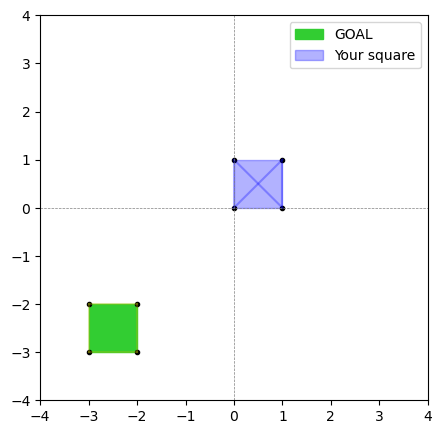

In [44]:
from utils import excercise2

W = 1 # width of the shape
H = 1 # height of the shape
X = 0
Y = 0

M2 = np.float32([[W, 0, X],
            	[0, H, Y],
            	[0, 0, 1]])
excercise2(M2)

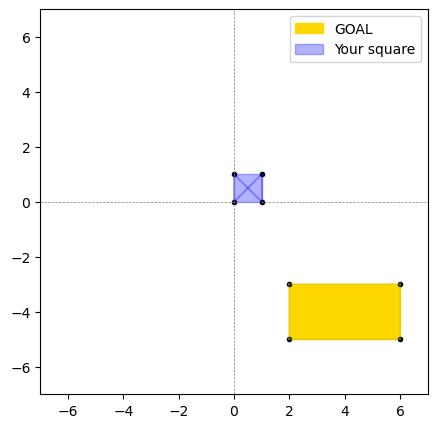

In [47]:
from utils import excercise3

W = 1 # width of the shape
H = 1 # height of the shape
X = 0
Y = 0

M3 = np.float32([[W, 0, X],
            	[0, H, Y],
            	[0, 0, 1]])
excercise3(M3)